**도구 - 판다스(pandas)**

*`pandas` 라이브러리는 사용하기 쉬운 고성능 데이터 구조와 데이터 분석 도구를 제공합니다. 주 데이터 구조는 `DataFrame`입니다. 이를 인-메모리(in-memory) 2D 테이블로 생각할 수 있습니다(열 이름과 행 레이블이 있는 스프레드시트와 비슷합니다). 엑셀에 있는 많은 기능을 프로그램에서 사용할 수 있습니다. 여기에는 피봇 테이블이나 다른 열을 기반으로 열을 계산하고 그래프 출력하는 기능 등이 포함됩니다. 열 값으로 행을 그룹핑할 수도 있습니다. 또한 SQL과 비슷하게 테이블을 조인할 수 있습니다. 판다스는 시계열 데이터를 다루는데도 뛰어납니다.*

필요 라이브러리:

* 넘파이(NumPy) – 넘파이에 익숙하지 않다면 지금 [넘파이 튜토리얼](tools_numpy.ipynb)을 둘러 보세요.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/tools_pandas.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# 설정

먼저 `pandas`를 임포트합니다. 보통 `pd`로 임포트합니다:

In [1]:
import pandas as pd

# `Series` 객체

`pandas` 라이브러리는 다음과 같은 유용한 데이터 구조를 포함하고 있습니다:

* `Series` 객체를 곧 이어서 설명하겠습니다. `Series` 객체는 1D 배열입니다. (열 이름과 행 레이블을 가진) 스프레드시트의 열과 비슷합니다.
* `DataFrame` 객체는 2D 테이블입니다. (열 이름과 행 레이블을 가진) 스프레드시트와 비슷합니다.

## `Series` 만들기

첫 번째 `Series` 객체를 만들어 보죠!

In [43]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

In [44]:
s[1]

-1

## 1D `ndarray`와 비슷합니다

`Series` 객체는 넘파이 `ndarray`와 비슷하게 동작합니다. 넘파이 함수에 매개변수로 종종 전달할 수 있습니다:

In [45]:
import numpy as np
np.exp(s) #거듭제곱

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [46]:
np.square(s) #제곱

0     4
1     1
2     9
3    25
dtype: int64

`Series` 객체에 대한 산술 연산도 가능합니다. `ndarray`와 비슷하게 *원소별*로 적용됩니다:

In [47]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

넘파이와 비슷하게 `Series`에 하나의 숫자를 더하면 `Series`에 있는 모든 원소에 더해집니다. 이를 *브로드캐스팅*(broadcasting)이라고 합니다:

In [48]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

`*`나 `/` 같은 모든 이항 연산과 심지어 조건 연산에서도 마찬가지입니다:

In [49]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

In [50]:
#불리언 값 이용하여 원하는 값 추출 가능
a = pd.Series([True, False, False, True])
s[a]

0    2
3    5
dtype: int64

In [51]:
s[s<0]

1   -1
dtype: int64

## 인덱스 레이블

`Series` 객체에 있는 각 원소는 *인덱스 레이블*(index label)이라 불리는 고유한 식별자를 가지고 있습니다. 기본적으로 `Series`에 있는 원소의 순서입니다(`0`에서 시작합니다). 하지만 수동으로 인덱스 레이블을 지정할 수도 있습니다:

In [3]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

그다음 `dict`처럼 `Series`를 사용할 수 있습니다:

In [5]:
s2[s2>s2.mean()]

bob         83
charles    112
dtype: int64

In [53]:
s2["bob"]

83

일반 배열처럼 정수 인덱스를 사용하여 계속 원소에 접근할 수 있습니다:

In [54]:
s2[1]

83

레이블이나 정수를 사용해 접근할 때 명확하게 하기 위해 레이블은 `loc` 속성을 사용하고 정수는 `iloc` 속성을 사용하는 것이 좋습니다:

In [55]:
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [56]:
s2.loc["alice"]

68

In [57]:
#iloc는 정수로 접근, loc는 label형태로 접근
s2.loc["bob"]

83

In [58]:
s2.iloc[1]

83

`Series`는 인덱스 레이블을 슬라이싱할 수도 있습니다:

In [59]:
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [60]:
#iloc는 마지막 인덱스 포함 하지 않음 하지만 loc같은 경우는 마지막 인덱스 포함한 값 출력함
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

In [61]:
#loc는 마지막 'darwin'의 값까지 포함해서 출력함
s2.loc['bob':'darwin']

bob         83
charles    112
darwin      68
dtype: int64

기본 정수 레이블을 사용할 때 예상 외의 결과를 만들 수 있기 때문에 주의해야 합니다:

In [5]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [8]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

보세요. 첫 번째 원소의 인덱스 레이블이 `2`입니다. 따라서 슬라이싱 결과에서 인덱스 레이블 `0`인 원소는 없습니다:

In [64]:
try:
    surprise_slice[0]
except KeyError as e:
    print("키 에러:", e)

키 에러: 0


하지만 `iloc` 속성을 사용해 정수 인덱스로 원소에 접근할 수 있습니다. `Series` 객체를 사용할 때 `loc`와 `iloc`를 사용하는 것이 좋은 이유입니다:

In [65]:
surprise_slice.iloc[0]

1002

In [66]:
surprise_slice.iloc[1]

1003

In [9]:
#원래의 값도 변경되어있음
surprise_slice[2] = 1004
surprise

0    1000
1    1001
2    1004
3    1003
dtype: int64

## `dict`에서 초기화

`dict`에서 `Series` 객체를 만들 수 있습니다. 키는 인덱스 레이블로 사용됩니다:

In [68]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

`Series`에 포함할 원소를 제어하고 `index`를 지정하여 명시적으로 순서를 결정할 수 있습니다:

In [69]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## 자동 정렬

여러 개의 `Series` 객체를 다룰 때 `pandas`는 자동으로 인덱스 레이블에 따라 원소를 정렬합니다.

In [70]:
s2.values

array([ 68,  83, 112,  68], dtype=int64)

In [71]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

만들어진 `Series`는 `s2`와 `s3`의 인덱스 레이블의 합집합을 담고 있습니다. `s2`에 `"colin"`이 없고 `s3`에 `"charles"`가 없기 때문에 이 원소는 `NaN` 값을 가집니다(Not-a-Number는 *누락*이란 의미입니다).

자동 정렬은 구조가 다고 누락된 값이 있는 여러 데이터를 다룰 때 매우 편리합니다. 하지만 올바른 인덱스 레이블을 지정하는 것을 잊는다면 원치않는 결과를 얻을 수 있습니다:

In [10]:
s9 = pd.Series([100,200], index = ["sleepy","tired"])
s9

sleepy    100
tired     200
dtype: int64

In [72]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

레이블이 하나도 맞지 않기 때문에 판다스가 이 `Series`를 정렬할 수 없습니다. 따라서 모두 `NaN`이 되었습니다.

## 스칼라로 초기화

스칼라와 인덱스 레이블의 리스트로 `Series` 객체를 초기화할 수도 있습니다: 모든 원소가 이 스칼라 값으로 설정됩니다.

In [73]:
#굳이 index라고 명시해주지 않아도 됨
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series` 이름

`Series`는 `name`을 가질 수 있습니다:

In [74]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## `Series` 그래프 출력

맷플롯립을 사용해 `Series` 데이터를 쉽게 그래프로 출력할 수 있습니다(맷플롯립에 대한 자세한 설명은 [맷플롯립 튜토리얼](tools_matplotlib.ipynb)을 참고하세요). 맷플롯립을 임포트하고 `plot()` 메서드를 호출하면 끝입니다:

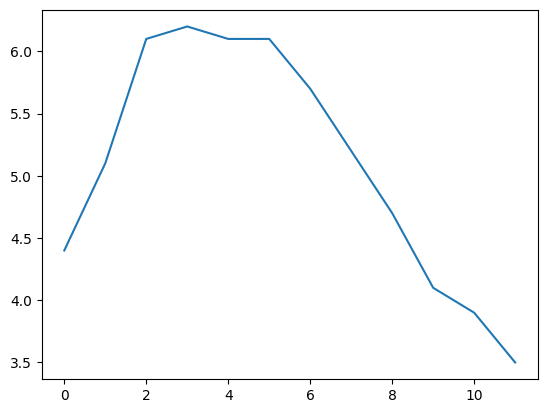

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

데이터를 그래프로 출력하는데 많은 *옵션*이 있습니다. 여기에서 모두 나열할 필요는 없습니다. 특정 종류의 그래프(히스토그램, 파이 차트 등)가 필요하면 판다스 문서의 [시각화](http://pandas.pydata.org/pandas-docs/stable/visualization.html) 섹션에서 예제 코드를 참고하세요.

# 시간 다루기

많은 데이터셋에 타임스탬프가 포함되어 있습니다. 판다스는 이런 데이터를 다루는데 뛰어납니다:
* (2016Q3 같은) 기간과 ("monthly" 같은) 빈도를 표현할 수 있습니다.
* 기간을 실제 타임스탬프로 변환하거나 그 반대로 변환할 수 있습니다.
* 데이터를 리샘플링하고 원하는 방식으로 값을 모을 수 있습니다.
* 시간대를 다룰 수 있습니다.

## 시간 범위

먼저 `pd.date_range()`를 사용해 시계열을 만들어 보죠. 이 함수는 2016년 10월 29일 5:30pm에서 시작하여 12시간마다 하나의 datetime을 담고 있는 `DatetimeIndex`를 반환합니다.

In [13]:
#freq를 2H로 변경하면 두 시간 간격으로 저장 가능함 + periods는 생성할 시계열의 갯수를 의미함
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [77]:
pd.date_range('2013/12/25 5:10am', periods = 12, freq = '2H')

DatetimeIndex(['2013-12-25 05:10:00', '2013-12-25 07:10:00',
               '2013-12-25 09:10:00', '2013-12-25 11:10:00',
               '2013-12-25 13:10:00', '2013-12-25 15:10:00',
               '2013-12-25 17:10:00', '2013-12-25 19:10:00',
               '2013-12-25 21:10:00', '2013-12-25 23:10:00',
               '2013-12-26 01:10:00', '2013-12-26 03:10:00'],
              dtype='datetime64[ns]', freq='2H')

In [78]:
pd.date_range('2023/12/25 3:27am', periods = 12, freq = "H")

DatetimeIndex(['2023-12-25 03:27:00', '2023-12-25 04:27:00',
               '2023-12-25 05:27:00', '2023-12-25 06:27:00',
               '2023-12-25 07:27:00', '2023-12-25 08:27:00',
               '2023-12-25 09:27:00', '2023-12-25 10:27:00',
               '2023-12-25 11:27:00', '2023-12-25 12:27:00',
               '2023-12-25 13:27:00', '2023-12-25 14:27:00'],
              dtype='datetime64[ns]', freq='H')

이 `DatetimeIndex`를 `Series`의 인덱스로 사용할수 있습니다:

In [14]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

In [15]:
temp_series[1]

5.1

이 시리즈를 그래프로 출력해 보죠:

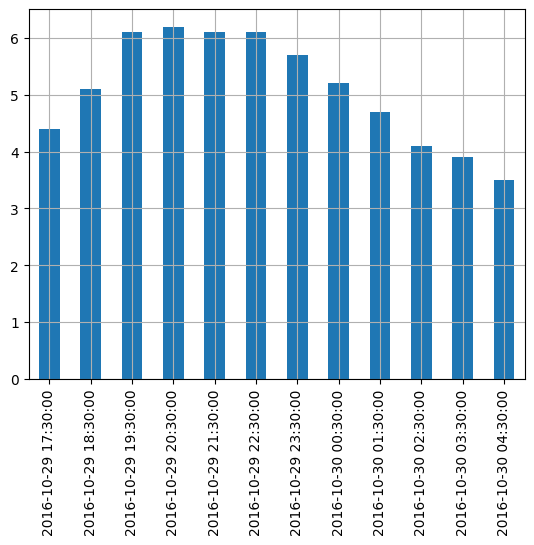

In [16]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

## 리샘플링

판다스는 매우 간단하게 시계열을 리샘플링할 수 있습니다. `resample()` 메서드를 호출하고 새로운 주기를 지정하면 됩니다:

In [82]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

In [85]:
temp_series_freq_3H = temp_series.resample("3H")
temp_series_freq_3H

In [87]:
temp_series_freq_3H.mean()

2016-10-29 15:00:00    4.400000
2016-10-29 18:00:00    5.800000
2016-10-29 21:00:00    5.966667
2016-10-30 00:00:00    4.666667
2016-10-30 03:00:00    3.700000
Freq: 3H, dtype: float64

리샘플링 연산은 사실 지연된 연산입니다. 그래서 `Series` 객체 대신 `DatetimeIndexResampler` 객체가 반환됩니다. 실제 리샘플링 연산을 수행하려면 `mean()` 같은 메서드를 호출할 수 있습니다. 이 메서드는 연속적인 시간 쌍에 대해 평균을 계산합니다:

In [83]:
temp_series_freq_2H = temp_series_freq_2H.mean()

In [84]:
temp_series_freq_2H

2016-10-29 16:00:00    4.40
2016-10-29 18:00:00    5.60
2016-10-29 20:00:00    6.15
2016-10-29 22:00:00    5.90
2016-10-30 00:00:00    4.95
2016-10-30 02:00:00    4.00
2016-10-30 04:00:00    3.50
Freq: 2H, dtype: float64

결과를 그래프로 출력해 보죠:

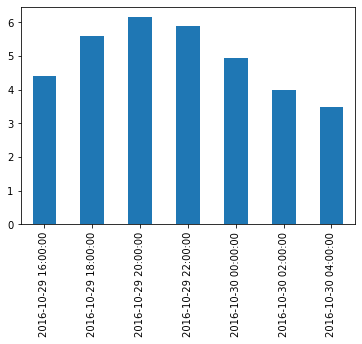

In [ ]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

2시간 간격으로 어떻게 값이 수집되었는지 확인해 보세요. 예를 들어 6-8pm 간격을 보면 6:30pm에서 `5.1`이고 7:30pm에서 `6.1`입니다. 리샘플링 후에 `5.1`과 `6.1`의 평균인 `5.6` 하나를 얻었습니다. 평균말고 어떤 집계 함수(aggregation function)도 사용할 수 있습니다. 예를 들어 각 기간에서 최솟값을 찾을 수 있습니다:

In [34]:
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [33]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

또는 동일한 효과를 내는 `apply()` 메서드를 사용할 수 있습니다:

In [40]:
a = temp_series.resample("2H").max()
a

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    6.1
2016-10-29 20:00:00    6.2
2016-10-29 22:00:00    6.1
2016-10-30 00:00:00    5.2
2016-10-30 02:00:00    4.1
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [15]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.max)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    6.1
2016-10-29 20:00:00    6.2
2016-10-29 22:00:00    6.1
2016-10-30 00:00:00    5.2
2016-10-30 02:00:00    4.1
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [92]:
temp_series_freq_H = temp_series.resample("H").apply(np.max)
temp_series_freq_H

2016-10-29 17:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 19:00:00    6.1
2016-10-29 20:00:00    6.2
2016-10-29 21:00:00    6.1
2016-10-29 22:00:00    6.1
2016-10-29 23:00:00    5.7
2016-10-30 00:00:00    5.2
2016-10-30 01:00:00    4.7
2016-10-30 02:00:00    4.1
2016-10-30 03:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: H, dtype: float64

## 업샘플링과 보간

다운샘플링의 예를 보았습니다. 하지만 업샘플링(즉, 빈도를 높입니다)도 할 수 있습니다. 하지만 데이터에 구멍을 만듭니다:

In [19]:
import numpy as np
temp_series.resample("15Min").apply(np.mean)

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
2016-10-29 20:00:00    NaN
2016-10-29 20:15:00    NaN
2016-10-29 20:30:00    6.2
2016-10-29 20:45:00    NaN
2016-10-29 21:00:00    NaN
2016-10-29 21:15:00    NaN
2016-10-29 21:30:00    6.1
2016-10-29 21:45:00    NaN
2016-10-29 22:00:00    NaN
2016-10-29 22:15:00    NaN
2016-10-29 22:30:00    6.1
2016-10-29 22:45:00    NaN
2016-10-29 23:00:00    NaN
2016-10-29 23:15:00    NaN
2016-10-29 23:30:00    5.7
2016-10-29 23:45:00    NaN
2016-10-30 00:00:00    NaN
2016-10-30 00:15:00    NaN
2016-10-30 00:30:00    5.2
2016-10-30 00:45:00    NaN
2016-10-30 01:00:00    NaN
2016-10-30 01:15:00    NaN
2016-10-30 01:30:00    4.7
2016-10-30 01:45:00    NaN
2016-10-30 02:00:00    NaN
2016-10-30 02:15:00    NaN
2016-10-30 02:30:00    4.1
2

In [16]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head`는 상위 n 개의 값만 출력합니다

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

한가지 방법은 보간으로 사이를 채우는 것입니다. 이렇게 하려면 `interpolate()` 메서드를 호출합니다. 기본값은 선형 보간이지만 3차 보간(cubic interpolation) 같은 다른 방법을 선택할 수 있습니다:

In [93]:
#interpolate()안에 아무것도 작성하지 않으면 보간법 적용되지 않음
temp_series_45min = temp_series.resample("45min").interpolate()
temp_series_45min

2016-10-29 17:15:00     NaN
2016-10-29 18:00:00     NaN
2016-10-29 18:45:00     NaN
2016-10-29 19:30:00    6.10
2016-10-29 20:15:00    6.10
2016-10-29 21:00:00    6.10
2016-10-29 21:45:00    6.10
2016-10-29 22:30:00    6.10
2016-10-29 23:15:00    5.75
2016-10-30 00:00:00    5.40
2016-10-30 00:45:00    5.05
2016-10-30 01:30:00    4.70
2016-10-30 02:15:00    4.40
2016-10-30 03:00:00    4.10
2016-10-30 03:45:00    3.80
2016-10-30 04:30:00    3.50
Freq: 45T, dtype: float64

In [95]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

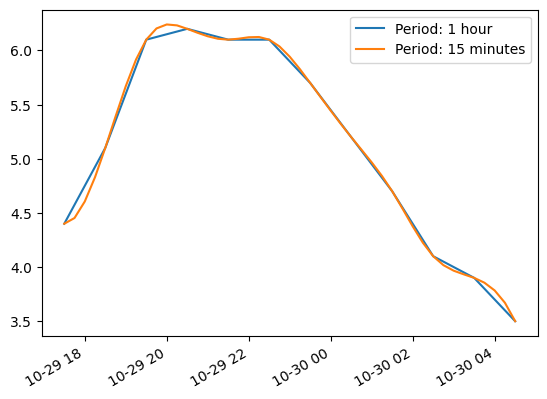

In [96]:
#업샘플링을 통해 그린 그래프가 더 부드러움
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

## 시간대

기본적으로 datetime은 *단순*합니다. 시간대(timezone)을 고려하지 않죠. 따라서 2016-10-30 02:30는 파리나 뉴욕이나 2016년 10월 30일 2:30pm입니다. `tz_localize()` 메서드로 시간대를 고려한 datetime을 만들 수 있습니다:

In [20]:
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

In [97]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
dtype: float64

모든 datetime에 `-04:00`이 추가됩니다. 즉 모든 시간은 [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) - 4시간을 의미합니다.

다음처럼 파리 시간대로 바꿀 수 있습니다:

In [ ]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

In [100]:
temp_series_london = temp_series_ny.tz_convert("Europe/London")
temp_series_london.head(5)

2016-10-29 22:30:00+01:00    4.4
2016-10-29 23:30:00+01:00    5.1
2016-10-30 00:30:00+01:00    6.1
2016-10-30 01:30:00+01:00    6.2
2016-10-30 01:30:00+00:00    6.1
dtype: float64

UTC와의 차이가 `+02:00`에서 `+01:00`으로 바뀐 것을 알 수 있습니다. 이는 프랑스가 10월 30일 3am에 겨울 시간으로 바꾸기 때문입니다(2am으로 바뀝니다). 따라서 2:30am이 두 번 등장합니다! 시간대가 없는 표현으로 돌아가 보죠(시간대가 없이 지역 시간으로 매시간 로그를 기록하는 경우 이와 비슷할 것입니다):

In [ ]:
#tz_localize(None) : 로컬 시간대를 사용하지 않고 일반적이 UTC시간대를 사용하겠다는 의미
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
dtype: float64

이렇게 되면 `02:30`이 정말 애매합니다. 시간대가 없는 datetime을 파리 시간대로 바꿀 때 에러가 발생합니다:

In [ ]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from 2016-10-30 02:30:00, try using the 'ambiguous' argument


다행히 `ambiguous` 매개변수를 사용하면 판다스가 타임스탬프의 순서를 기반으로 적절한 DST(일광 절약 시간제)를 추측합니다:

In [ ]:
#ambiguous = "infer"는 모호한 시간대를 알아서 pandas에서 처리해줌
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

## 기간

`pd.period_range()` 함수는 `DatetimeIndex`가 아니라 `PeriodIndex`를 반환합니다. 예를 들어 2016과 2017년의 전체 분기를 가져와 보죠:

In [2]:
#periods는 생성하고자 하는 매개변수의 개수를 의미
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]')

`PeriodIndex`에 숫자 `N`을 추가하면 `PeriodIndex` 빈도의 `N` 배만큼 이동시킵니다:

In [7]:
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]')

`asfreq()` 메서드를 사용하면 `PeriodIndex`의 빈도를 바꿀 수 있습니다. 모든 기간이 늘어나거나 줄어듭니다. 예를 들어 분기 기간을 모두 월별 기간으로 바꾸어 보죠:

In [ ]:
#월별 기간
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

In [3]:
#일별 기간
quarters.asfreq("d")

PeriodIndex(['2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
             '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31'],
            dtype='period[D]')

기본적으로 `asfreq`는 각 기간의 끝에 맞춥니다. 기간의 시작에 맞추도록 변경할 수 있습니다:

In [8]:
quarters.asfreq("M", how="start")

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]')

In [5]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]')

간격을 늘릴 수도 있습니다:

In [9]:
# "A"는 Anunual의 약자로 년도를 변경할 때 사용
quarters.asfreq("A")

PeriodIndex(['2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017'], dtype='period[A-DEC]')

물론 `PeriodIndex`로 `Series`를 만들 수 있습니다:

In [7]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index = quarters)
quarterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

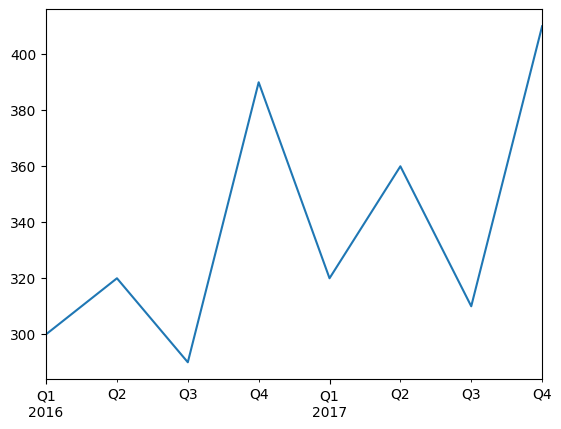

In [12]:
from matplotlib import pyplot as plt
quarterly_revenue.plot(kind="line")
plt.show()

`to_timestamp`를 호출해서 기간을 타임스탬프로 변경할 수 있습니다. 기본적으로 기간의 첫 번째 날을 반환합니다. 하지만 `how`와 `freq`를 지정해서 기간의 마지막 시간을 얻을 수 있습니다:

In [17]:
#how를 start으로 변경
quarterly_revenue.to_timestamp( how="start",freq="H")

2016-01-01    300
2016-04-01    320
2016-07-01    290
2016-10-01    390
2017-01-01    320
2017-04-01    360
2017-07-01    310
2017-10-01    410
Freq: QS-OCT, dtype: int64

In [9]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2016-03-31 23:59:59.999999999    300
2016-06-30 23:59:59.999999999    320
2016-09-30 23:59:59.999999999    290
2016-12-31 23:59:59.999999999    390
2017-03-31 23:59:59.999999999    320
2017-06-30 23:59:59.999999999    360
2017-09-30 23:59:59.999999999    310
2017-12-31 23:59:59.999999999    410
dtype: int64

`to_peroid`를 호출하면 다시 기간으로 돌아갑니다:

In [10]:
last_hours.to_period()

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

판다스는 여러 가지 시간 관련 함수를 많이 제공합니다. [온라인 문서](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)를 확인해 보세요. 예를 하나 들면 2016년 매월 마지막 업무일의 9시를 얻는 방법은 다음과 같습니다:

In [24]:
#asfreq : how를 따로 지정해주지 않으면 how = "end"가 기본값으로 지정됨
#to_timestamp : how를 지정해주지 않으면 None으로 지정되기 때문에 변화가 없음
month_2023 = pd.period_range("2023", periods = 12, freq="M")
one_day_after_last = month_2023.asfreq("D") +1 
one_day_after_last
last_day = one_day_after_last.to_timestamp() - pd.tseries.offsets.BDay()
last_day.to_period("H") + 9 #기본 시간값에 9를 더해서 9시로 만들어줌

PeriodIndex(['2023-01-31 09:00', '2023-02-28 09:00', '2023-03-31 09:00',
             '2023-04-28 09:00', '2023-05-31 09:00', '2023-06-30 09:00',
             '2023-07-31 09:00', '2023-08-31 09:00', '2023-09-29 09:00',
             '2023-10-31 09:00', '2023-11-30 09:00', '2023-12-29 09:00'],
            dtype='period[H]')

In [21]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
#Bday는 Business day를 의미하며 휴일을 제외한 나머지 날짜를 말함
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]')

# `DataFrame` 객체

데이터프레임 객체는 스프레드시트를 표현합니다. 셀 값, 열 이름, 행 인덱스 레이블을 가집니다. 다른 열을 바탕으로 열을 계산하는 식을 쓸 수 있고 피봇 테이블을 만들고, 행을 그룹핑하고, 그래프를 그릴 수 있습니다. `DataFrame`을 `Series`의 딕셔너리로 볼 수 있습니다.

## `DataFrame` 만들기

`Series` 객체의 딕셔너리를 전달하여 데이터프레임을 만들 수 있습니다:

In [25]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


몇가지 알아 두어야 할 것은 다음과 같습니다:

* `Series`는 인덱스를 기반으로 자동으로 정렬됩니다.
* 누락된 값은 `NaN`으로 표현됩니다.
* `Series` 이름은 무시됩니다(`"year"`란 이름은 삭제됩니다).
* `DataFrame`은 주피터 노트북에서 멋지게 출력됩니다!

예상하는 방식으로 열을 참조할 수 있고 `Serires` 객체가 반환됩니다:

In [ ]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [16]:
people.birthyear

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

동시에 여러 개의 열을 선택할 수 있습니다:

In [ ]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [29]:
people.iloc[:,[1,3]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [23]:
people.iloc[1,1]

1984

In [24]:
people.loc[['alice'],:]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking


In [18]:
people.loc[:,['birthyear']]

,birthyear
alice,1985
bob,1984
charles,1992


## Dataframe 반환

열 리스트나 행 인덱스 레이블을 `DataFrame` 생성자에 전달하면 해당 열과 행으로 채워진 데이터프레임이 반환됩니다. 예를 들면:

In [45]:
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [19]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


`DataFrame`을 만드는 또 다른 편리한 방법은 `ndarray`나 리스트의 리스트로 모든 값을 생성자에게 전달하고 열 이름과 행 인덱스 레이블을 각기 지정하는 것입니다:

In [32]:
import numpy as np

In [33]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


누락된 값을 지정하려면 `np.nan`이나 넘파이 마스크 배열을 사용합니다:

In [34]:
masked_array = np.ma.asarray(values, dtype= object) #np.ma.asarray는 np.nan 그대로 유지함
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


In [ ]:
import numpy as np

values = np.array([[1.0, np.nan, 3.0],
                   [4.0, 5.0, np.nan]])

# np.nan 값을 np.ma.masked로 변경
masked_array = np.ma.masked_array(values, np.isnan(values))


`ndarray` 대신에 `DataFrame` 객체를 전달할 수도 있습니다:

In [53]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


딕셔너리의 딕셔너리(또는 리스트의 리스트)로 `DataFrame`을 만들 수 있습니다:

In [28]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## 멀티 인덱싱

모든 열이 같은 크기의 튜플이면 멀티 인덱스로 인식합니다. 열 인덱스 레이블에도 같은 방식이 적용됩니다. 예를 들면:

In [29]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

이제 `"public"` 열을 모두 담은 `DataFrame`을 손쉽게 만들 수 있습니다:

In [56]:
d5["public"] # d5.public과 같음

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [57]:
d5["public", "hobby"]  # d5["public"]["hobby"]와 같습니다.

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

In [58]:
d5['public']['birthyear']

Paris   alice      1985
        bob        1984
London  charles    1992
Name: birthyear, dtype: int64

In [27]:
d5["public"]['hobby']

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: hobby, dtype: object

## 레벨 낮추기

`d5`를 다시 확인해 보죠:

In [48]:
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

열의 레벨(level)이 2개이고 인덱스 레벨이 2개입니다. `droplevel()`을 사용해 열 레벨을 낮출 수 있습니다(인덱스도 마찬가지입니다):

In [49]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

In [50]:
#index도 위와 같이 drop가능
d6 = d5.copy()
d6.index = d6.droplevel(level=0)
d6

,birthyear,hobby,weight,children
"(1985, Biking, 68, nan)",1985,Biking,68,NaN
"(1984, Dancing, 83, 3.0)",1984,Dancing,83,3.0
"(1992, nan, 112, 0.0)",1992,NaN,112,0.0


## 전치

`T` 속성을 사용해 열과 인덱스를 바꿀 수 있습니다:

In [51]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

## 레벨 스택과 언스택

`stack()` 메서드는 가장 낮은 열 레벨을 가장 낮은 인덱스 뒤에 추가합니다:

In [62]:
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

In [52]:
#열을 행의 인덱스로 변환하는 것(alice, bob, charles가 열에서 행으로 변환됨)
d7 = d6.stack()
d7

London    Paris
birthyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
children  bob        NaN      3.0
          charles    0.0      NaN

`NaN` 값이 생겼습니다. 이전에 없던 조합이 생겼기 때문입니다(예를 들어 `London`에 `bob`이 없었습니다).

`unstack()`을 호출하면 반대가 됩니다. 여기에서도 많은 `NaN` 값이 생성됩니다.

In [53]:
#행의 인덱스 레벨을 열로 변환하는 것
#행으로 변했던 이름이 열로 이동함 
d8 = d7.unstack()
d8

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
children     NaN  NaN     0.0     NaN      3.0     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN

`unstack`을 다시 호출하면 `Series` 객체가 만들어 집니다:

In [54]:
d9 = d8.unstack()
d9

London  alice    birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        bob      birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        charles  birthyear       1992
                 children         0.0
                 hobby            NaN
                 weight           112
Paris   alice    birthyear       1985
                 children         NaN
                 hobby         Biking
                 weight            68
        bob      birthyear       1984
                 children         3.0
                 hobby        Dancing
                 weight            83
        charles  birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
dtype: object

`stack()`과 `unstack()` 메서드를 사용할 때 스택/언스택할 `level`을 선택할 수 있습니다. 심지어 한 번에 여러 개의 레벨을 스택/언스택할 수도 있습니다:

In [61]:
d9.unstack(level=0)

London    Paris
alice   birthyear    NaN     1985
        children     NaN      NaN
        hobby        NaN   Biking
        weight       NaN       68
bob     birthyear    NaN     1984
        children     NaN      3.0
        hobby        NaN  Dancing
        weight       NaN       83
charles birthyear   1992      NaN
        children     0.0      NaN
        hobby        NaN      NaN
        weight       112      NaN

In [55]:
d10 = d9.unstack(level = (0,1))
d10

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
children     NaN  NaN     0.0     NaN      3.0     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN

## 대부분의 메서드는 수정된 복사본을 반환합니다

눈치챘겠지만 `stack()`과 `unstack()` 메서드는 객체를 수정하지 않습니다. 대신 복사본을 만들어 반환합니다. 판다스에 있는 대부분의 메서드들이 이렇게 동작합니다.

## Pivot

In [30]:
import pandas._testing as tm

def unpivot(frame):
    N, K = frame.shape
    data = {
        "value": frame.to_numpy().ravel("F"), #ravel : 다차원 배열 1차원 배열로 만듦
        "variable": np.asarray(frame.columns).repeat(N), #N번 반복
        "date": np.tile(np.asarray(frame.index), K), #k번 반복해서 새로운 배열 생성
    }
    return pd.DataFrame(data, columns=["date", "variable", "value"])


df = unpivot(tm.makeTimeDataFrame(3))

df

,date,variable,value
0,2000-01-03,A,1.284506
1,2000-01-04,A,-0.347140
2,2000-01-05,A,1.337726
3,2000-01-03,B,-0.286219
4,2000-01-04,B,0.817838
5,2000-01-05,B,-2.090122
6,2000-01-03,C,0.733344
7,2000-01-04,C,0.657007
8,2000-01-05,C,-0.040598
9,2000-01-03,D,1.882573


In [31]:
filtered = df[df["variable"] == "A"]
filtered

,date,variable,value
0,2000-01-03,A,1.284506
1,2000-01-04,A,-0.347140
2,2000-01-05,A,1.337726


In [32]:
#pivot은 중복되는 값 사용하지 않고 기본적으로 마지막 값을 사용함 + 만약 중복되는 값 중 평균을 사용하고 싶다면 아래 코드 "value" 뒤에 aggfunc = "mean"을 넣어서 사용 가능
pivoted = df.pivot(index = "date", columns = "variable", values = "value")
pivoted

variable,A,B,C,D
date,,,,
2000-01-03,1.284506,-0.286219,0.733344,1.882573
2000-01-04,-0.347140,0.817838,0.657007,2.839784
2000-01-05,1.337726,-2.090122,-0.040598,-0.526889


In [39]:
pivoted["A"]

date
2000-01-03    1.811220
2000-01-04    0.569411
2000-01-05    0.494455
Name: A, dtype: float64

In [40]:
pivoted.columns

Index(['A', 'B', 'C', 'D'], dtype='object', name='variable')

In [41]:
pivoted.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05'], dtype='datetime64[ns]', name='date', freq=None)

In [34]:
#index,column값 지정해주지 않으면 값이 여러 개 나옴
df["value2"] = df["value"] * 2
df

,date,variable,value,value2
typing.Literal[<no_default>],,,,
0,2000-01-03,A,1.284506,2.569011
1,2000-01-04,A,-0.347140,-0.694280
2,2000-01-05,A,1.337726,2.675451
3,2000-01-03,B,-0.286219,-0.572439
4,2000-01-04,B,0.817838,1.635676
5,2000-01-05,B,-2.090122,-4.180244
6,2000-01-03,C,0.733344,1.466688
7,2000-01-04,C,0.657007,1.314013
8,2000-01-05,C,-0.040598,-0.081196


In [46]:
df.columns

Index(['date', 'variable', 'value', 'value2'], dtype='object')

In [35]:
#pivot은 재구조화해주는 함수로 행과열을 재배치해 새로운 구조 생성
pivoted = df.pivot(index="date", columns="variable")

pivoted

value                                  value2             
variable           A         B         C         D         A         B   
date                                                                     
2000-01-03  1.284506 -0.286219  0.733344  1.882573  2.569011 -0.572439  \
2000-01-04 -0.347140  0.817838  0.657007  2.839784 -0.694280  1.635676   
2000-01-05  1.337726 -2.090122 -0.040598 -0.526889  2.675451 -4.180244   

                                
variable           C         D  
date                            
2000-01-03  1.466688  3.765146  
2000-01-04  1.314013  5.679567  
2000-01-05 -0.081196 -1.053778

In [47]:
pivoted["value2"]

variable,A,B,C,D
date,,,,
2000-01-03,3.622440,1.795095,-1.311077,-0.527870
2000-01-04,1.138821,1.489595,0.081361,-1.805730
2000-01-05,0.988910,0.624462,1.174982,4.289959


In [45]:
pivoted.columns

MultiIndex([( 'value', 'A'),
            ( 'value', 'B'),
            ( 'value', 'C'),
            ( 'value', 'D'),
            ('value2', 'A'),
            ('value2', 'B'),
            ('value2', 'C'),
            ('value2', 'D')],
           names=[None, 'variable'])

## 행 참조하기

`people` `DataFrame`으로 돌아가 보죠:

In [48]:
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


`loc` 속성으로 열 대신 행을 참조할 수 있습니다. `DataFrame`의 열 이름이 행 인덱스 레이블로 매핑된 `Series` 객체가 반환됩니다:

In [62]:
people.loc[:,['birthyear']]

,birthyear
alice,1985
bob,1984
charles,1992


In [51]:
people['birthyear']

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [50]:
people.loc[:,'birthyear']

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [ ]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

In [53]:
people.iloc[2]

weight        112
birthyear    1992
children      0.0
hobby         NaN
Name: charles, dtype: object

`iloc` 속성을 사용해 정수 인덱스로 행을 참조할 수 있습니다:

In [ ]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

행을 슬라이싱할 수 있으며 `DataFrame` 객체가 반환됩니다:

In [ ]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


마자믹으로 불리언 배열을 전달하여 해당하는 행을 가져올 수 있습니다:

In [ ]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


불리언 표현식을 사용할 때 아주 유용합니다:

In [54]:
people[people["birthyear"] < 1990]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing


## 열 추가, 삭제

`DataFrame`을 `Series`의 딕셔너리처럼 다룰 수 있습니다. 따라서 다음 같이 쓸 수 있습니다:

In [36]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [37]:
people["age"] = 2018 - people["birthyear"]  # "age" 열을 추가합니다
people["over 30"] = people["age"] > 30      # "over 30" 열을 추가합니다
birthyears = people.pop("birthyear") #people에서 birthyear만 추출한 값이 birthyears에 저장됨
del people["children"]


people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [65]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

새로운 열을 추가할 때 행의 개수는 같아야 합니다. 누락된 행은 `NaN`으로 채워지고 추가적인 행은 무시됩니다:

In [68]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice 누락됨, eugene은 무시됨
people

,hobby,weight,children,age,over 30,pets
alice,Biking,68,NaN,33,True,NaN
bob,Dancing,83,3.0,34,True,0.0
charles,NaN,112,0.0,26,False,5.0


새로운 열을 추가할 때 기본적으로 (오른쪽) 끝에 추가됩니다. `insert()` 메서드를 사용해 다른 곳에 열을 추가할 수 있습니다:

In [58]:
people.insert(1, "height", [172, 181, 185])
people

,weight,height,hobby,age,over 30,pets
alice,68,172,Biking,33,True,NaN
bob,83,181,Dancing,34,True,0.0
charles,112,185,NaN,26,False,5.0


## 새로운 열 할당하기

`assign()` 메서드를 호출하여 새로운 열을 만들 수도 있습니다. 이는 새로운 `DataFrame` 객체를 반환하며 원본 객체는 변경되지 않습니다:

In [59]:
#assign 사용 x
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,weight,height,hobby,age,over 30,pets,body_mass_index,has_pets
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,False
charles,112,185,NaN,26,False,5.0,32.724617,True


할당문 안에서 만든 열은 접근할 수 없습니다:

In [60]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("키 에러:", e)

키 에러: 'body_mass_index'


해결책은 두 개의 연속된 할당문으로 나누는 것입니다:

In [61]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,True
charles,112,185,NaN,26,False,5.0,32.724617,True


임시 변수 `d6`를 만들면 불편합니다. `assign()` 메서드를 연결하고 싶겠지만 `people` 객체가 첫 번째 할당문에서 실제로 수정되지 않기 때문에 작동하지 않습니다:

In [ ]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("키 에러:", e)

키 에러: 'body_mass_index'


하지만 걱정하지 마세요. 간단한 방법이 있습니다. `assign()` 메서드에 함수(전형적으로 `lambda` 함수)를 전달하면 `DataFrame`을 매개변수로 이 함수를 호출할 것입니다:

In [ ]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


문제가 해결되었군요!

## 표현식 평가

판다스가 제공하는 뛰어난 기능 하나는 표현식 평가입니다. 이는 `numexpr` 라이브러리에 의존하기 때문에 설치가 되어 있어야 합니다.

In [62]:
people

,weight,height,hobby,age,over 30,pets
alice,68,172,Biking,33,True,NaN
bob,83,181,Dancing,34,True,0.0
charles,112,185,NaN,26,False,5.0


In [ ]:
#eval은 해당 데이터 계산 편리하게 해줌(inplace = TRUE는 해당 데이터 수정가능하게 하는것 기본값은 FALSE임)
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

할당 표현식도 지원됩니다. `inplace=True`로 지정하면 수정된 복사본을 만들지 않고 바로 `DataFrame`을 변경합니다:

In [75]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,weight,height,hobby,age,over 30,pets,body_mass_index
alice,68,172,Biking,33,True,NaN,22.985398
bob,83,181,Dancing,34,True,0.0,25.335002
charles,112,185,NaN,26,False,5.0,32.724617


`'@'`를 접두어로 사용하여 지역 변수나 전역 변수를 참조할 수 있습니다:

In [76]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,False
charles,112,185,NaN,26,False,5.0,32.724617,True


## `DataFrame` 쿼리하기

`query()` 메서드를 사용하면 쿼리 표현식에 기반하여 `DataFrame`을 필터링할 수 있습니다:

In [66]:
people.query("age > 30 and pets == 0")

,weight,height,hobby,age,over 30,pets
bob,83,181,Dancing,34,True,0.0


##### 아래의 방법이 더 자주 사용됨

In [67]:
people[(people["age"]>30) & (people["pets"]==0)]

,weight,height,hobby,age,over 30,pets
bob,83,181,Dancing,34,True,0.0


In [69]:
mask = people[(people["age"]>30) & (people["pets"]==0)]
mask

,hobby,weight,children,age,over 30,pets
bob,Dancing,83,3.0,34,True,0.0


## `DataFrame` 정렬

`sort_index` 메서드를 호출하여 `DataFrame`을 정렬할 수 있습니다. 기본적으로 인덱스 레이블을 기준으로 오름차순으로 행을 정렬합니다. 여기에서는 내림차순으로 정렬해 보죠:

In [ ]:
#df.sort_values(by='나이', ascending=True) : 특정열을 기준으로 정렬하고 싶을 때
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,Dancing,181,83,34,True,0.0,25.335002,False
alice,Biking,172,68,33,True,NaN,22.985398,False


`sort_index`는 `DataFrame`의 정렬된 *복사본*을 반환합니다. `people`을 직접 수정하려면 `inplace` 매개변수를 `True`로 지정합니다. 또한 `axis=1`로 지정하여 열 대신 행을 정렬할 수 있습니다:

In [ ]:
#inplace는 원본 데이터를 직접적으로 변경할 것이냐를 결정하는 것
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


레이블이 아니라 값을 기준으로 `DataFrame`을 정렬하려면 `sort_values`에 정렬하려는 열을 지정합니다:

In [ ]:
people.sort_values(by="age", inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,26,32.724617,185,NaN,False,True,5.0,112
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83


## `DataFrame` 그래프 그리기

`Series`와 마찬가지로 판다스는 `DataFrame` 기반으로 멋진 그래프를 손쉽게 그릴 수 있습니다.

예를 들어 `plot` 메서드를 호출하여 `DataFrame`의 데이터에서 선 그래프를 쉽게 그릴 수 있습니다:

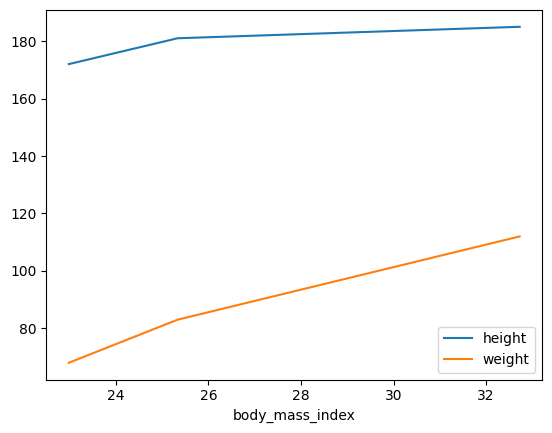

In [77]:
people.plot(kind = "line", x = "body_mass_index", y = ["height", "weight"])
plt.show()

맷플롯립의 함수가 지원하는 다른 매개변수를 사용할 수 있습니다. 예를 들어, 산점도를 그릴 때 맷플롯립의 `scatter()` 함수의 `s` 매개변수를 사용해 크기를 지정할 수 있습니다:

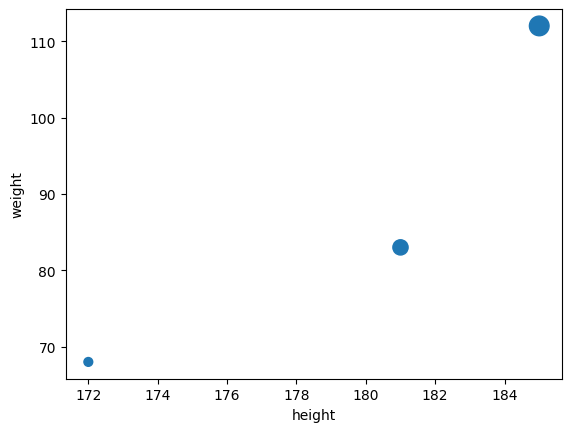

In [78]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

선택할 수 있는 옵션이 많습니다. 판다스 문서의 [시각화](http://pandas.pydata.org/pandas-docs/stable/visualization.html) 페이지에서 마음에 드는 그래프를 찾아 예제 코드를 살펴 보세요.

## `DataFrame` 연산

`DataFrame`이 넘파이 배열을 흉내내려는 것은 아니지만 몇 가지 비슷한 점이 있습니다. 예제 `DataFrame`을 만들어 보죠:

In [72]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


`DataFrame`에 넘파이 수학 함수를 적용하면 모든 값에 이 함수가 적용됩니다:

In [ ]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


비슷하게 `DataFrame`에 하나의 값을 더하면 `DataFrame`의 모든 원소에 이 값이 더해집니다. 이를 *브로드캐스팅*이라고 합니다:

In [ ]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


물론 산술 연산(`*`,`/`,`**`...)과 조건 연산(`>`, `==`...)을 포함해 모든 이항 연산에도 마찬가지 입니다:

In [ ]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


In [73]:
grades[grades >= 5]

,sep,oct,nov
alice,8.0,8,9.0
bob,10.0,9,9.0
charles,NaN,8,NaN
darwin,9.0,10,10.0


`DataFrame`의 `max`, `sum`, `mean` 같은 집계 연산은 각 열에 적용되어 `Series` 객체가 반환됩니다:

In [ ]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

`all` 메서드도 집계 연산입니다: 모든 값이 `True`인지 아닌지 확인합니다. 모든 학생의 점수가 `5` 이상인 월을 찾아 보죠:

In [ ]:
#grades데이터 안에 모든 점수가 5이상인 월 추출
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [ ]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

`any` 메서드는 하나라도 참이면 `True`를 반환합니다. 한 번이라도 10점을 받은 사람을 찾아 보죠:

In [ ]:
#grades데이터 안에서 하나라도 10 이상이면 True값 출력
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

`DataFrame`에 `Series` 객체를 더하면 (또는 다른 이항 연산을 수행하면) 판다스는 `DataFrame`에 있는 모든 *행*에 이 연산을 브로드캐스팅합니다. 이는 `Series` 객체가 `DataFrame`의 행의 개수와 크기가 같을 때만 동작합니다. 예를 들어 `DataFrame`의 `mean`(`Series` 객체)을 빼보죠:

In [77]:
grades - grades.mean()  # grades - [7.75, 8.75, 7.50] 와 동일

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


모든 9월 성적에서 `7.75`를 빼고, 10월 성적에서 `8.75`를 빼고, 11월 성적에서 `7.50`을 뺍니다. 이는 다음 `DataFrame`을 빼는 것과 같습니다:

In [ ]:
#데이터프레임 생성할 때 열을 기준으로 같은 값이 생성됨
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


모든 성적의 전체 평균을 빼고 싶다면 다음과 같은 방법을 사용합니다:

In [79]:
grades.values

array([[ 8,  8,  9],
       [10,  9,  9],
       [ 4,  8,  2],
       [ 9, 10, 10]])

In [78]:
grades - grades.values.mean() # 모든 점수에서 전체 평균(8.00)을 뺍니다

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## 자동 정렬

`Series`와 비슷하게 여러 개의 `DataFrame`에 대한 연산을 수행하면 판다스는 자동으로 행 인덱스 레이블로 정렬하지만 열 이름으로도 정렬할 수 있습니다. 10월부터 12월까지 보너스 포인트를 담은 `DataFrame`을 만들어 보겠습니다:

In [80]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [ ]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


덧셈 연산이 수행되었지만 너무 많은 원소가 `NaN`이 되었습니다. `DataFrame`을 정렬할 때 일부 열과 행이 한 쪽에만 있기 때문입니다. 다른 쪽에는 누란되었다고 간주합니다(`NaN`). `NaN`에 어떤 수를 더하면 `NaN`이 됩니다.

## 누락된 데이터 다루기

실제 데이터에서 누락된 데이터를 다루는 경우는 자주 발생합니다. 판다스는 누락된 데이터를 다룰 수 있는 몇 가지 방법을 제공합니다.

위 데이터에 있는 문제를 해결해 보죠. 예를 들어, 누락된 데이터는 `NaN`이 아니라 0이 되어야 한다고 결정할 수 있습니다. `fillna()` 메서드를 사용해 모든 `NaN` 값을 어떤 값으로 바꿀 수 있습니다:

In [82]:
#fillna() : 괄호 안 숫자로 NA값 채워줌
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


9월의 점수를 0으로 만드는 것은 공정하지 않습니다. 누락된 점수는 그대로 두고, 누락된 보너스 포인트는 0으로 바꿀 수 있습니다:

In [84]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0 #alice에 해당하는 모든 열의 값이 0으로 반환됨
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


훨씬 낫네요: 일부 데이터를 꾸며냈지만 덜 불공정합니다.

누락된 값을 다루는 또 다른 방법은 보간입니다. `bonus_points` `DataFrame`을 다시 보죠:

In [ ]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


`interpolate` 메서드를 사용해 보죠. 기본적으로 수직 방향(`axis=0`)으로 보간합니다. 따라서 수평으로(`axis=1`)으로 보간하도록 지정합니다.

In [89]:
#bonus_points.iloc[1].interplolate
#행을 기준으로 앞뒤에 있는 값으로 보간해줌
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


bob의 보너스 포인트는 10월에 0이고 12월에 2입니다. 11월을 보간하면 평균 보너스 포인트 1을 얻습니다. colin의 보너스 포인트는 11월에 1이지만 9월에 포인트는 얼마인지 모릅니다. 따라서 보간할 수 없고 10월의 포인트는 그대로 누락된 값으로 남아 있습니다. 이를 해결하려면 보간하기 전에 9월의 보너스 포인트를 0으로 설정해야 합니다.

In [90]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


좋습니다. 이제 모든 보너스 포인트가 합리적으로 보간되었습니다. 최종 점수를 확인해 보죠:

In [91]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


9월 열이 오른쪽에 추가되었는데 좀 이상합니다. 이는 더하려는 `DataFrame`이 정확히 같은 열을 가지고 있지 않기 때문입니다(`grade` `DataFrame`에는 `"dec"` 열이 없습니다). 따라서 판다스는 알파벳 순서로 최종 열을 정렬합니다. 이를 해결하려면 덧셈을 하기 전에 누락된 열을 추가하면 됩니다:

In [92]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


12월과 colin에 대해 할 수 있는 것이 많지 않습니다. 보너스 포인트를 만드는 것이 나쁘지만 점수를 합리적으로 올릴 수는 없습니다(어떤 선생님들은 그럴 수 있지만). `dropna()` 메서드를 사용해 모두 `NaN`인 행을 삭제합니다:

In [93]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


그다음 `axis` 매개변수를 `1`로 지정하여 모두 `NaN`인 열을 삭제합니다:

In [94]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


## `groupby`로 집계하기

SQL과 비슷하게 판다스는 데이터를 그룹핑하고 각 그룹에 대해 연산을 수행할 수 있습니다.

먼저 그루핑을 위해 각 사람의 데이터를 추가로 만들겠습니다. `NaN` 값을 어떻게 다루는지 보기 위해 `final_grades` `DataFrame`을 다시 사용하겠습니다:

In [95]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


hobby로 이 `DataFrame`을 그룹핑해 보죠:

In [96]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

이제 hobby마다 평균 점수를 계산할 수 있습니다:

In [97]:
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


아주 쉽네요! 평균을 계산할 때 `NaN` 값은 그냥 무시됩니다.

## 피봇 테이블

판다스는 스프레드시트와 비슷하 [피봇 테이블](https://en.wikipedia.org/wiki/Pivot_table)을 지원하여 데이터를 빠르게 요약할 수 있습니다. 어떻게 동작하는 알아 보기 위해 간단한 `DataFrame`을 만들어 보죠:

In [98]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [99]:
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


In [100]:
#각 행의 해당하는 행으로 새롭게 들어감
final_grades_clean.stack()

alice    sep     8.0
         oct     8.0
         nov     9.0
bob      sep    10.0
         oct     9.0
         nov    10.0
charles  sep     4.0
         oct    11.0
         nov     5.0
darwin   sep     9.0
         oct    10.0
         nov    11.0
dtype: float64

In [101]:
final_grades_clean.stack().reset_index()

,level_0,level_1,0
0,alice,sep,8.0
1,alice,oct,8.0
2,alice,nov,9.0
3,bob,sep,10.0
4,bob,oct,9.0
5,bob,nov,10.0
6,charles,sep,4.0
7,charles,oct,11.0
8,charles,nov,5.0
9,darwin,sep,9.0


In [106]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,charles,sep,4.0,3.0
7,charles,oct,11.0,3.0
8,charles,nov,5.0,0.0
9,darwin,sep,9.0,0.0


이제 이 `DataFrame`에 대해 `pd.pivot_table()` 함수를 호출하고 `name` 열로 그룹핑합니다. 기본적으로 `pivot_table()`은 수치 열의 평균을 계산합니다:

In [110]:
#values 정해주지 않으면 에러 발생함
pd.pivot_table(more_grades, index="name", values=['bonus','grade'])

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


집계 함수를 `aggfunc` 매개변수로 바꿀 수 있습니다. 또한 집계 대상의 열을 리스트로 지정할 수 있습니다:

In [107]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max) #aggfunc는 피봇테이블에서만 사용

,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


`columns` 매개변수를 지정하여 수평으로 집계할 수 있고 `margins=True`로 설정해 각 행과 열에 대해 전체 합을 계산할 수 있습니다:

In [111]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


마지막으로 여러 개의 인덱스나 열 이름을 지정하면 판다스가 다중 레벨 인덱스를 만듭니다:

In [ ]:
#pivot_table안에서 index는 group_by 역할 수행
pd.pivot_table(more_grades, index=("name", "month"), margins=True)

bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    2.000  10.00
        oct      NaN   9.00
        sep    0.000  10.00
charles nov    0.000   5.00
        oct    3.000  11.00
        sep    3.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

## 함수

큰 `DataFrame`을 다룰 때 내용을 간단히 요약하는 것이 도움이 됩니다. 판다스는 이를 위한 몇 가지 함수를 제공합니다. 먼저 수치 값, 누락된 값, 텍스트 값이 섞인 큰 `DataFrame`을 만들어 보죠. 주피터 노트북은 이 `DataFrame`의 일부만 보여줍니다:

In [ ]:
#fromfunction : 사용자 정의 함수 불러옴
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


`head()` 메서드는 처음 5개 행을 반환합니다:

In [ ]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


마지막 5개 행을 반환하는 `tail()` 함수도 있습니다. 원하는 행 개수를 전달할 수도 있습니다:

In [ ]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


`info()` 메서드는 각 열의 내용을 요약하여 출력합니다:

In [ ]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

마지막으로 `describe()` 메서드는 각 열에 대한 주요 집계 연산을 수행한 결과를 보여줍니다:

Finally, the `describe()` method gives a nice overview of the main aggregated values over each column:
* `count`: null(NaN)이 아닌 값의 개수
* `mean`: null이 아닌 값의 평균
* `std`: null이 아닌 값의 [표준 편차](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%ED%8E%B8%EC%B0%A8)
* `min`: null이 아닌 값의 최솟값
* `25%`, `50%`, `75%`: null이 아닌 값의 25번째, 50번째, 75번째 [백분위수](https://ko.wikipedia.org/wiki/%EB%B0%B1%EB%B6%84%EC%9C%84%EC%88%98)
* `max`: null이 아닌 값의 최댓값

In [ ]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# 저장 & 로딩

판다스는 `DataFrame`를 여러 가지 포맷으로 저장할 수 있습니다. CSV, Excel, JSON, HTML, HDF5, SQL 데이터베이스 같은 포맷이 가능합니다. 예제를 위해 `DataFrame`을 하나 만들어 보겠습니다:

In [2]:
import pandas as pd
import numpy as np

In [3]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## 저장

CSV, HTML, JSON로 저장해 보죠:

In [4]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")


저장된 내용을 확인해 보죠:

In [ ]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



인덱스는 (이름 없이) CSV 파일의 첫 번째 열에 저장되었습니다. HTML에서는 `<th>` 태그와 JSON에서는 키로 저장되었습니다.

다른 포맷으로 저장하는 것도 비슷합니다. 하지만 일부 포맷은 추가적인 라이브러리 설치가 필요합니다. 예를 들어, 엑셀로 저장하려면 openpyxl 라이브러리가 필요합니다:

In [ ]:
try:
    my_df.to_excel("my_df.xlsx", sheet_name='People')
except ImportError as e:
    print(e)

No module named 'openpyxl'


## 로딩

CSV 파일을 `DataFrame`으로 로드해 보죠:

In [ ]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


예상할 수 있듯이 `read_json`, `read_html`, `read_excel` 함수도 있습니다. 인터넷에서 데이터를 바로 읽을 수도 있습니다. 예를 들어 깃허브에서 1,000개의 U.S. 도시를 로드해 보죠:

In [ ]:
us_cities = None
try:
    csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

HTTP Error 403: Forbidden


이외에도 많은 옵션이 있습니다. 특히 datetime 포맷에 관련된 옵션이 많습니다. 더 자세한 내용은 온라인 [문서](http://pandas.pydata.org/pandas-docs/stable/io.html)를 참고하세요.

# `DataFrame` 합치기

## SQL 조인

판다스의 강력한 기능 중 하나는 `DataFrame`에 대해 SQL 같은 조인(join)을 수행할 수 있는 것입니다. 여러 종류의 조인이 지원됩니다. 이너 조인(inner join), 레프트/라이트 아우터 조인(left/right outer join), 풀 조인(full join)입니다. 이에 대해 알아 보기 위해 간단한 `DataFrame`을 만들어 보죠:

In [113]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [114]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


이제 `merge()` 함수를 사용해 이 `DataFrame`을 조인해 보죠:

In [115]:
pd.merge(left=city_loc, right=city_pop, on="city")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


두 `DataFrame`은 `state`란 이름의 열을 가지고 있으므로 `state_x`와 `state_y`로 이름이 바뀌었습니다.

또한 Cleveland, Salt Lake City, Houston은 두 `DataFrame`에 모두 존재하지 않기 때문에 삭제되었습니다. SQL의 `INNER JOIN`과 동일합니다. 도시를 삭제하지 않고 `NaN`으로 채우는 `FULL OUTER JOIN`을 원하면 `how="outer"`로 지정합니다:

In [ ]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


물론 `LEFT OUTER JOIN`은 `how="left"`로 지정할 수 있습니다. 왼쪽의 `DataFrame`에 있는 도시만 남습니다. 비슷하게 `how="right"`는 오른쪽 `DataFrame`에 있는 도시만 결과에 남습니다. 예를 들면:

In [ ]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


조인할 키가 `DataFrame` 인덱스라면 `left_index=True`나 `right_index=True`로 지정해야 합니다. 키 열의 이름이 다르면 `left_on`과 `right_on`을 사용합니다. 예를 들어:

In [ ]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## 연결

`DataFrame`을 조인하는 대신 그냥 연결할 수도 있습니다. `concat()` 함수가 하는 일입니다:

In [ ]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


이 연산은 (행을 따라) 수직적으로 데이터를 연결하고 (열을 따라) 수평으로 연결하지 않습니다. 이 예에서 동일한 인덱스를 가진 행이 있습니다(예를 들면 3). 판다스는 이를 우아하게 처리합니다:

In [ ]:
result_concat.loc[3]

,state,city,lat,lng,population
3,OH,Cleveland,41.473508,-81.739791,NaN
3,California,San Francisco,NaN,NaN,808976.0


또는 인덱스를 무시하도록 설정할 수 있습니다:

In [ ]:
pd.concat([city_loc, city_pop], ignore_index=True)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


한 `DataFrame`에 열이 없을 때 `NaN`이 채워져 있는 것처럼 동작합니다. `join="inner"`로 설정하면 *양쪽*의 `DataFrame`에 존재하는 열만 반환됩니다:

In [ ]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


`axis=1`로 설정하면 `DataFrame`을 수직이 아니라 수평으로 연결할 수 있습니다:

In [ ]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


이 경우 인덱스가 잘 정렬되지 않기 때문에 의미가 없습니다(예를 들어 Cleveland와 San Francisco의 인덱스 레이블이 `3`이기 때문에 동일한 행에 놓여 있습니다). 이 `DataFrame`을 연결하기 전에 도시로 인덱스를 재설정해 보죠:

In [ ]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)

,state,lat,lng,population,state
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New-York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


`FULL OUTER JOIN`을 수행한 것과 비슷합니다. 하지만 `state` 열이 `state_x`와 `state_y`로 바뀌지 않았고 `city` 열이 인덱스가 되었습니다.

`append()` 메서드는 `DataFrame`을 수직으로 연결하는 단축 메서드입니다:

In [ ]:
city_loc.append(city_pop)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


판다스의 다른 메서드와 마찬가지로 `append()` 메서드는 실제 `city_loc`을 수정하지 않습니다. 복사본을 만들어 수정한 다음 반환합니다.

# 범주

범주로 표현된 값을 가진 경우가 흔합니다. 예를 들어 `1`은 여성, `2`는 남성이거나 `"A"`는 좋은 것, `"B"`는 평균, `"C"`는 나쁜 것 등입니다. 범주형 값을 읽기 힘들고 다루기 번거롭습니다. 하지만 판다스에서는 간단합니다. 예를 들기 위해 앞서 만든 `city_pop` `DataFrame`에 범주를 표현하는 열을 추가해 보겠습니다:

In [ ]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


이제 `eco_code`열은 의미없는 코드입니다. 이를 바꿔 보죠. 먼저 `eco_code`를 기반으로 새로운 범주형 열을 만듭니다:

In [ ]:
city_eco["economy"] = city_eco["eco_code"].astype('category')
city_eco["economy"].cat.categories

Int64Index([17, 20, 34], dtype='int64')

의미있는 이름을 가진 범주를 지정할 수 있습니다:

In [ ]:
city_eco["economy"].cat.categories = ["Finance", "Energy", "Tourism"]
city_eco

,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy


범주형 값은 알파벳 순서가 아니라 범주형 순서로 정렬합니다:

In [ ]:
city_eco.sort_values(by="economy", ascending=False)

,population,city,state,eco_code,economy
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance


# 그 다음엔?

이제 알았겠지만 판다스는 매우 커다란 라이브러리이고 기능이 많습니다. 가장 중요한 기능들을 둘러 보았지만 빙산의 일각일 뿐입니다. 더 많은 것을 익히려면 실전 데이터로 직접 실습해 보는 것이 제일 좋습니다. 판다스의 훌륭한 [문서](http://pandas.pydata.org/pandas-docs/stable/index.html)와 [쿡북](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)을 보는 것도 좋습니다.